In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Завантаження даних
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

# Об'єднання тренувальних та тестових даних
all_data = pd.concat([train_data, test_data], ignore_index=True)

# Заповнення відсутніх значень "Age" та "Fare"
all_data['Age'].fillna(all_data['Age'].median(), inplace=True)
all_data['Fare'].fillna(all_data['Fare'].median(), inplace=True)

# Заповнення відсутніх значень "Embarked"
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace=True)

# Кодування категоріальних змінних "Sex" та "Embarked"
all_data['Sex'] = all_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
all_data['Embarked'] = all_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

<Axes: >

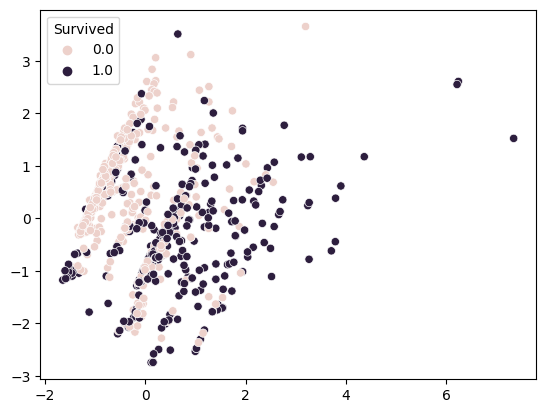

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Визначення кількості кластерів
n_clusters_list = [2, 3, 4, 5]

# Вибір ознак для кластеризації
features = ['Age', 'Fare', 'Embarked', 'Sex']

# Отримання вибраних ознак для кластеризації
X = all_data[features].values

# Нормалізація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Вибір кількості компонент для зведення розмірності
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Відображення ознак у двовимірному просторі
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=all_data['Survived'])

c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

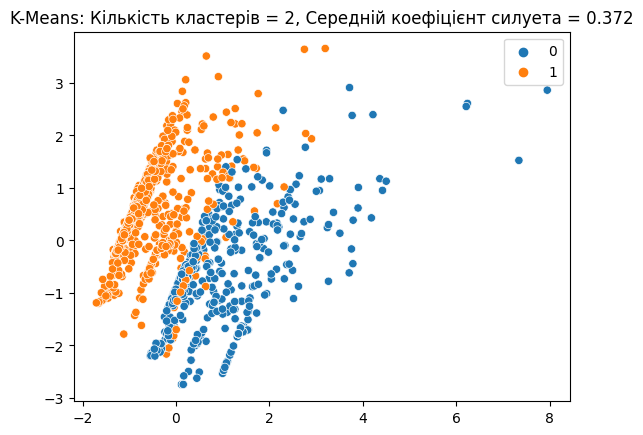

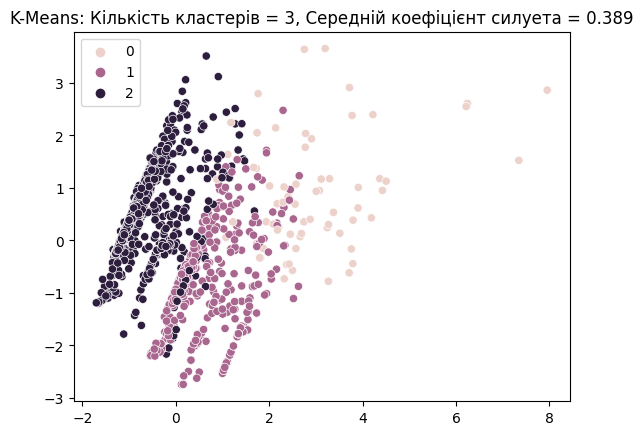

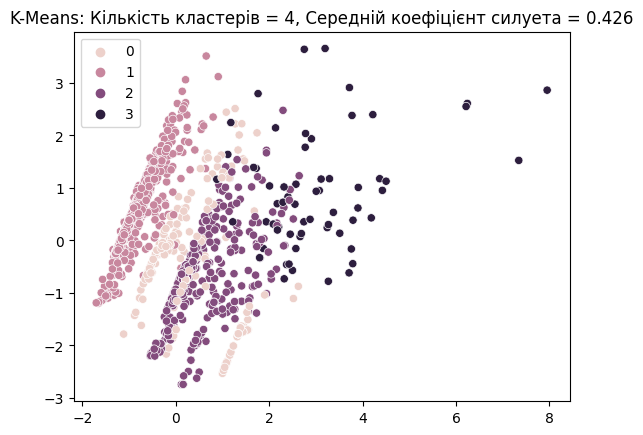

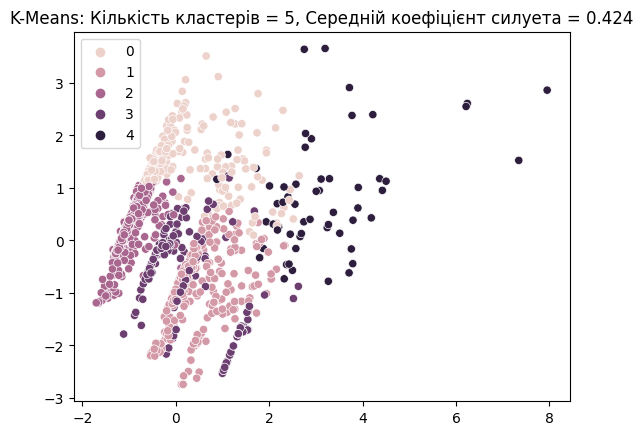

In [13]:
for n_clusters in n_clusters_list:
    # Застосування алгоритму K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)

    # Отримання міток кластерів
    labels = kmeans.labels_

    # Обчислення коефіцієнту силуета
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Візуалізація результатів
    plt.figure()
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels)
    plt.title("K-Means: Кількість кластерів = {}, Середній коефіцієнт силуета = {:.3f}".format(n_clusters, silhouette_avg))

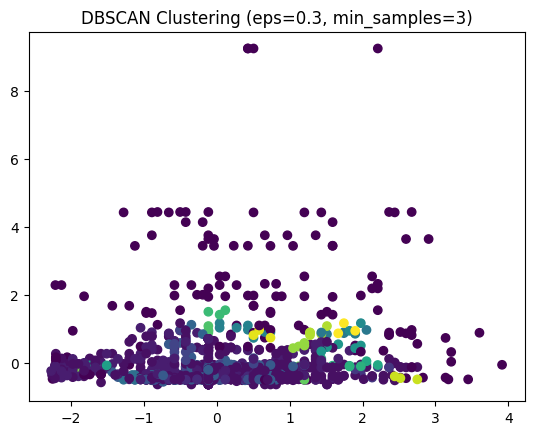

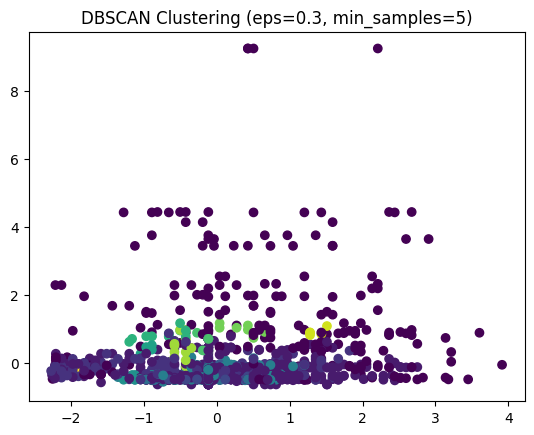

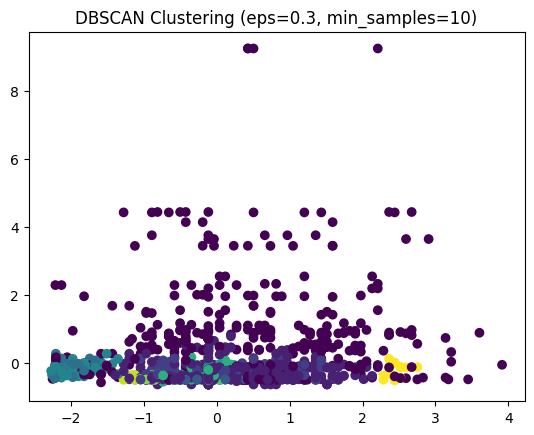

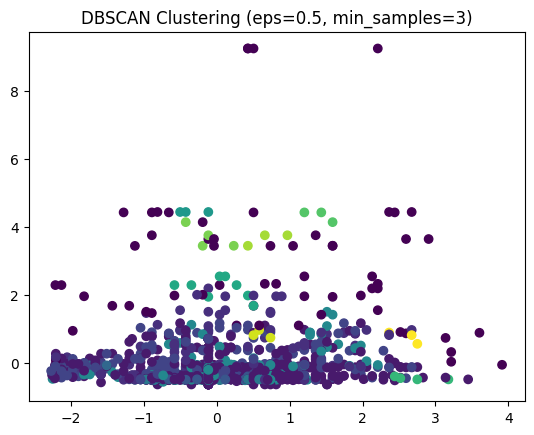

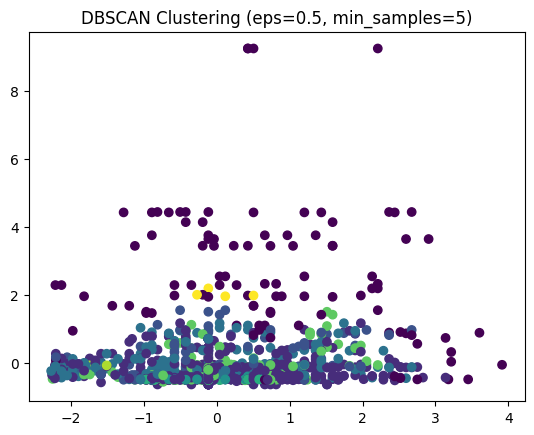

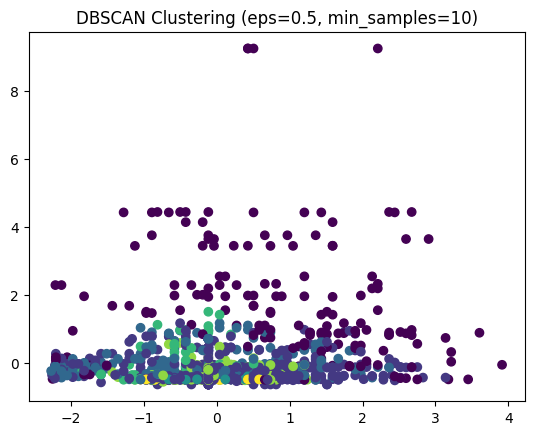

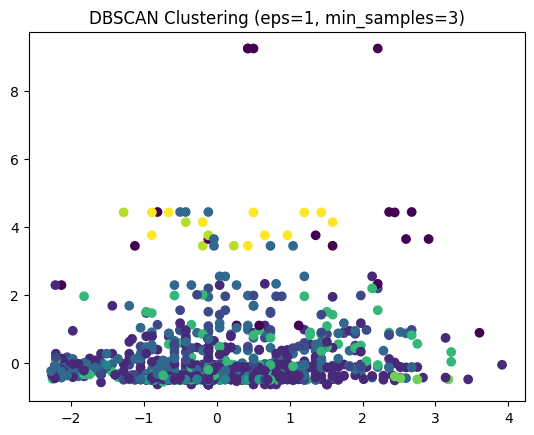

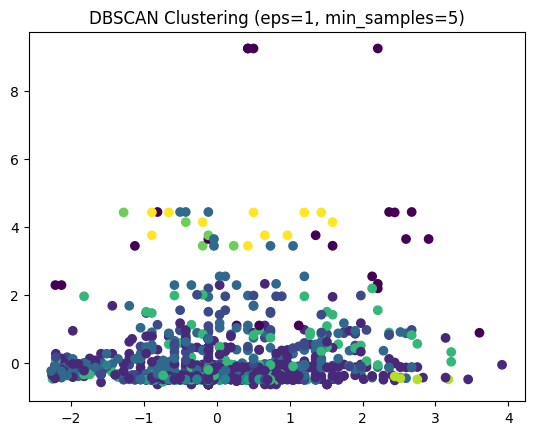

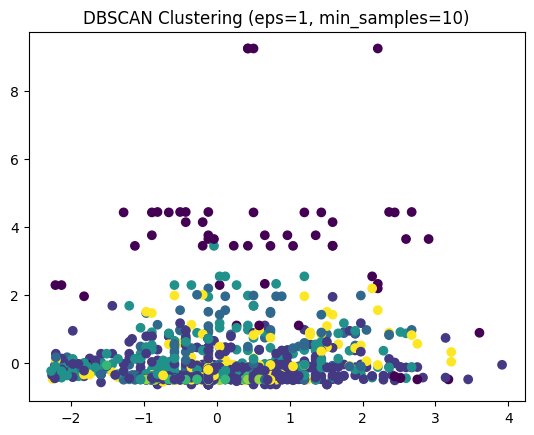

In [14]:
# Проведення кластеризації за допомогою алгоритму DBSCAN з різними параметрами

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

eps_values = [0.3, 0.5, 1]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_scaled)
        labels = dbscan.labels_
        
        # Візуалізація кластерів
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels)
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.show()

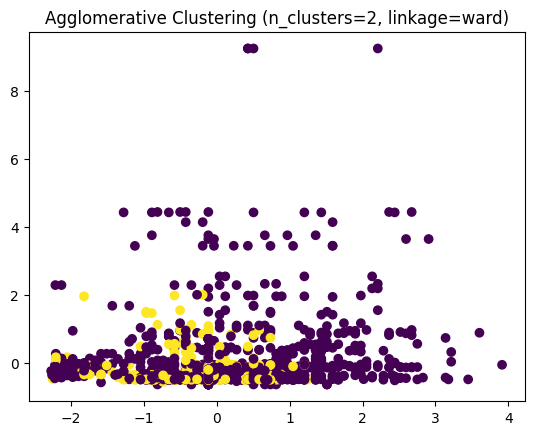

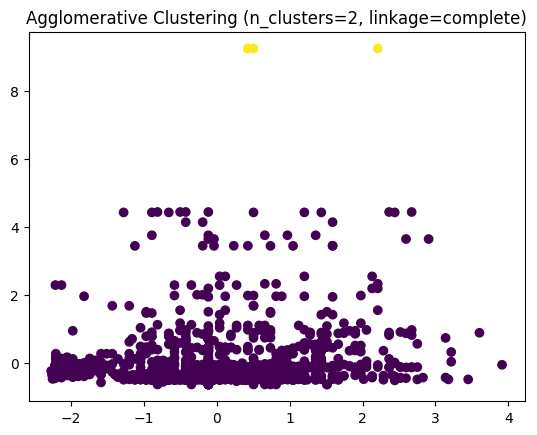

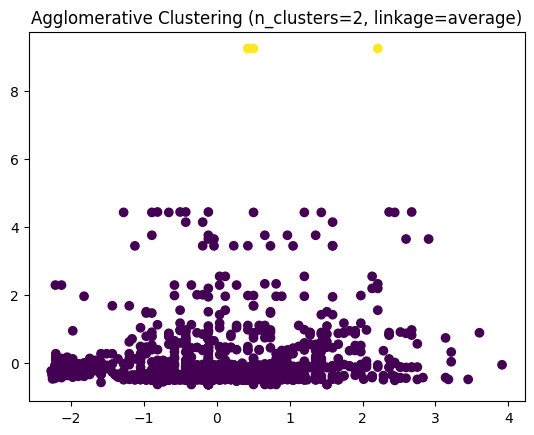

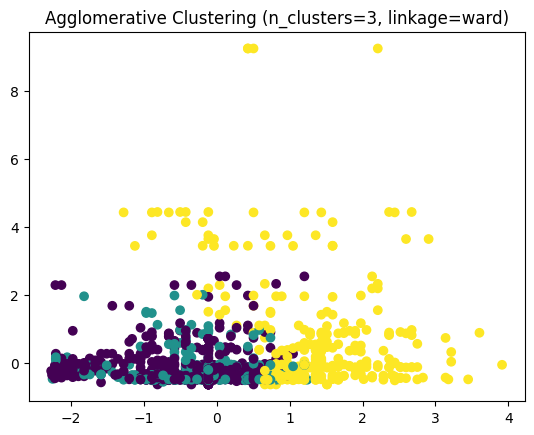

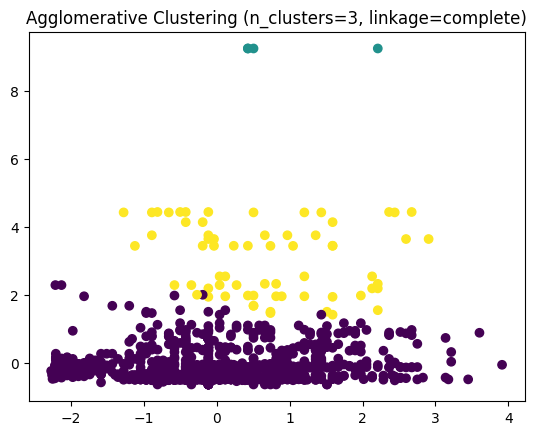

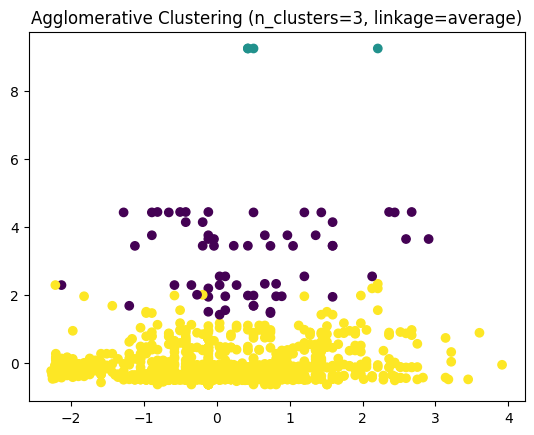

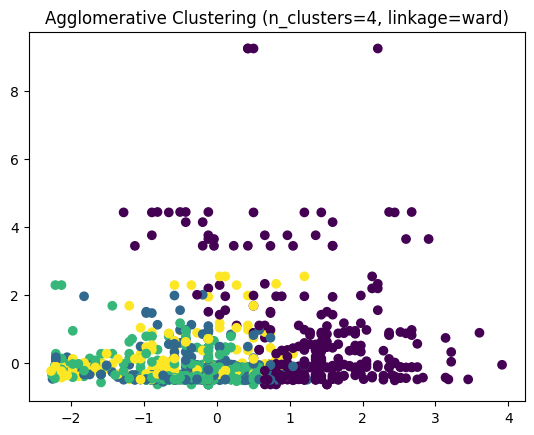

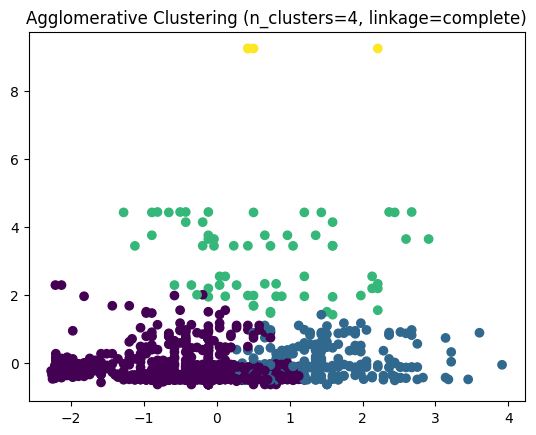

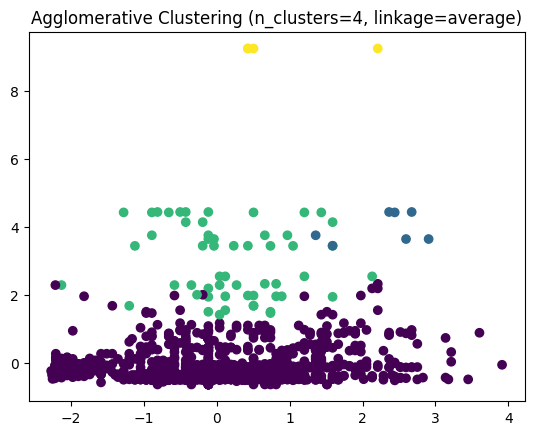

In [15]:
# Проведення кластеризації за допомогою алгоритму AgglomerativeClustering з різними параметрами

from sklearn.cluster import AgglomerativeClustering

n_clusters_values = [2, 3, 4]
linkage_values = ['ward', 'complete', 'average']

for n_clusters in n_clusters_values:
    for linkage in linkage_values:
        agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        agg_cluster.fit(X_scaled)
        labels = agg_cluster.labels_
        
        # Візуалізація кластерів
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels)
        plt.title(f'Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage})')
        plt.show()

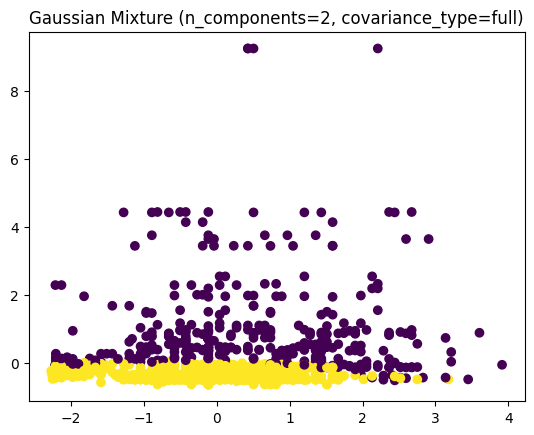

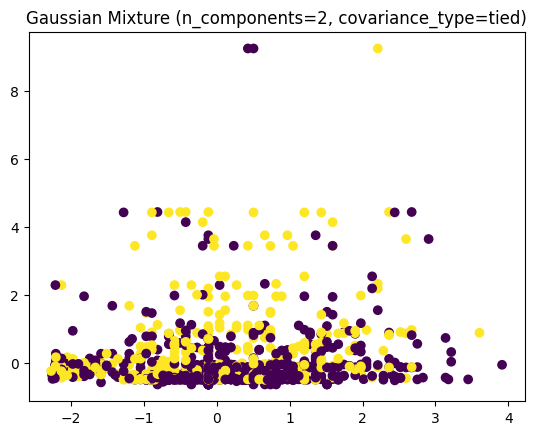

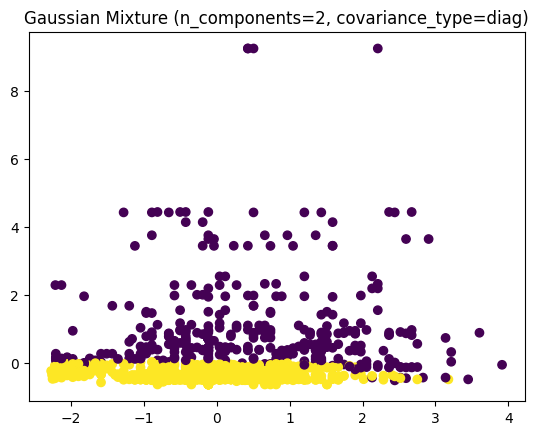

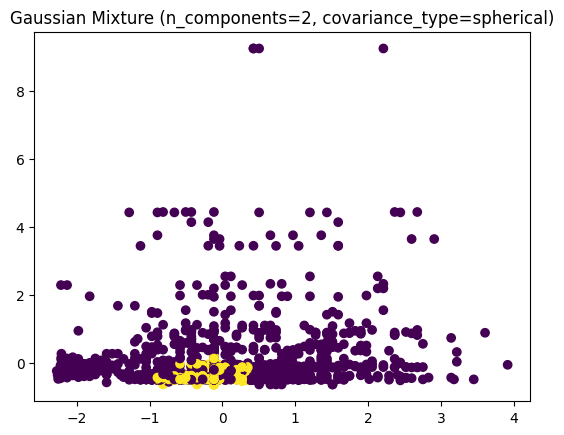

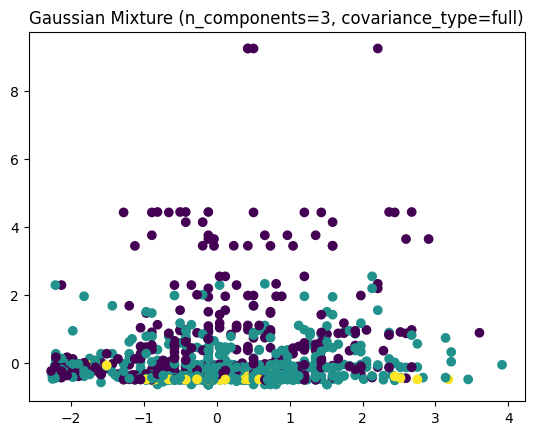

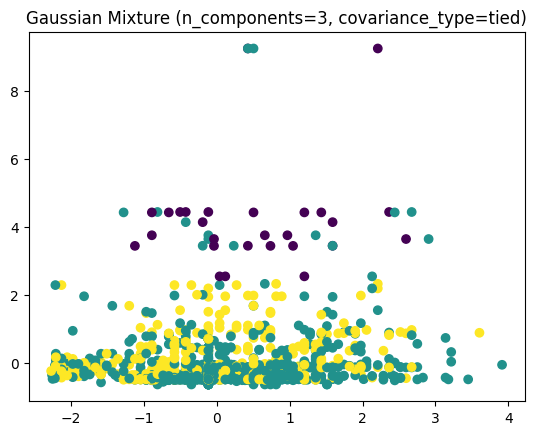

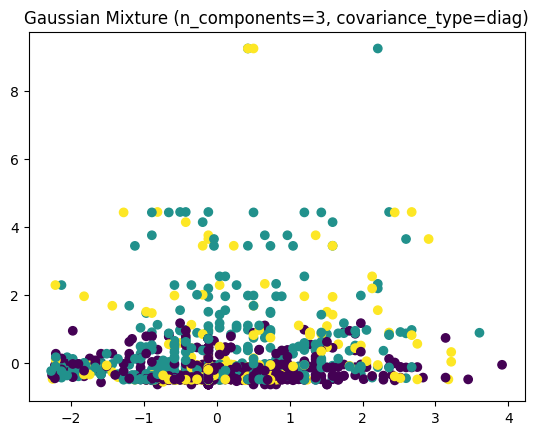

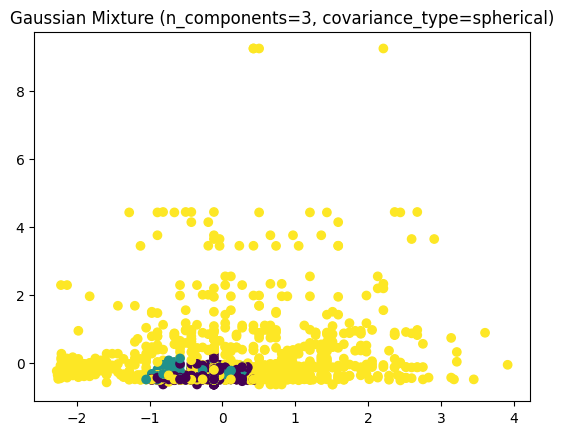

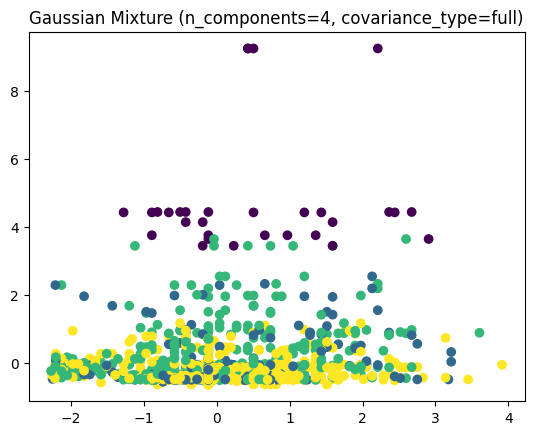

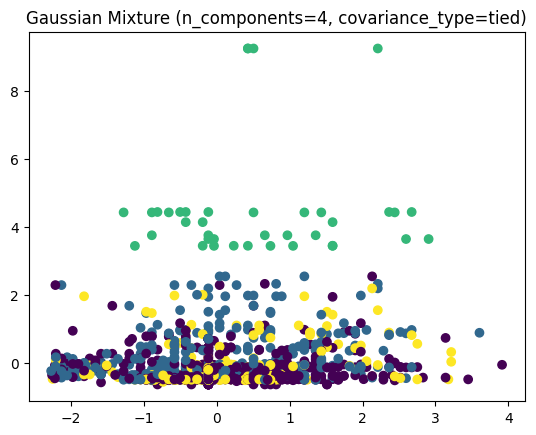

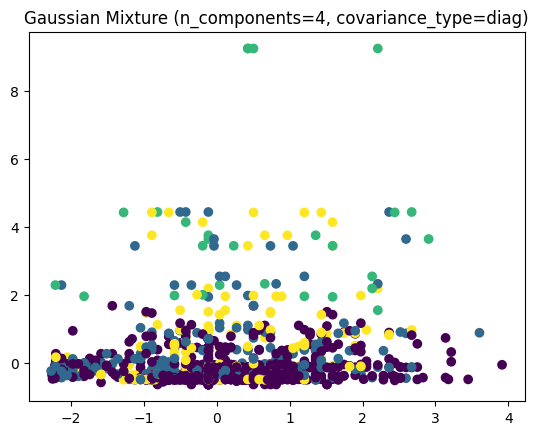

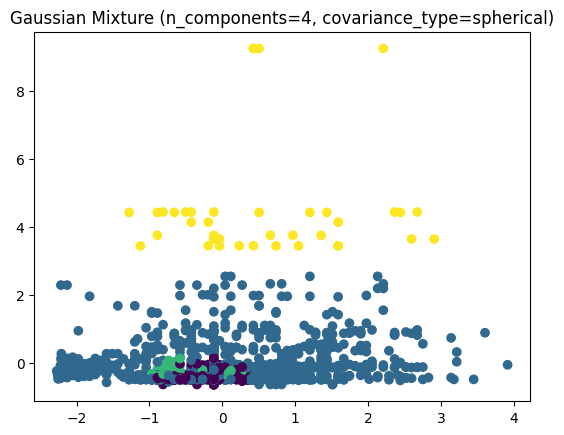

In [16]:
# Проведення кластеризації за допомогою алгоритму GaussianMixture з різними параметрами

from sklearn.mixture import GaussianMixture

n_components_values = [2, 3, 4]
covariance_type_values = ['full', 'tied', 'diag', 'spherical']

for n_components in n_components_values:
    for covariance_type in covariance_type_values:
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
        gmm.fit(X_scaled)
        labels = gmm.predict(X_scaled)
        
        # Візуалізація кластерів
        plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels)
        plt.title(f'Gaussian Mixture (n_components={n_components}, covariance_type={covariance_type})')
        plt.show()